In [56]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
data = pd.read_csv(r"kidney_disease.csv") 
#Borra todas las filas que tengan algun campo NaN
data.dropna(inplace = True)
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [58]:
print(data.describe())

               id         age          bp          sg          al          su  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean   274.841772   49.563291   74.050633    1.019873    0.797468    0.253165   
std    102.998517   15.512244   11.175381    0.005499    1.413130    0.813397   
min      3.000000    6.000000   50.000000    1.005000    0.000000    0.000000   
25%    243.000000   39.250000   60.000000    1.020000    0.000000    0.000000   
50%    298.500000   50.500000   80.000000    1.020000    0.000000    0.000000   
75%    355.750000   60.000000   80.000000    1.025000    1.000000    0.000000   
max    399.000000   83.000000  110.000000    1.025000    4.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000  
mean   131.341772   52.575949    2.188608  138.848101    4.636709   13.687342  
std     64.939832   47.395382 

In [59]:
data.rbc = data.rbc.replace({"normal":1,"abnormal":0})
data.pc = data.pc.replace({"normal":1,"abnormal":0})
data.pcc = data.pcc.replace({"present":1,"notpresent":0})
data.ba = data.ba.replace({"present":1,"notpresent":0})
data.htn = data.htn.replace({"yes":1,"no":0})
data.dm = data.dm.replace({"yes":1,"no":0})
data.cad = data.cad.replace({"yes":1,"no":0})
data.appet = data.appet.replace({"good":1,"poor":0})
data.pe = data.pe.replace({"yes":1,"no":0})
data.ane = data.ane.replace({"yes":1,"no":0})

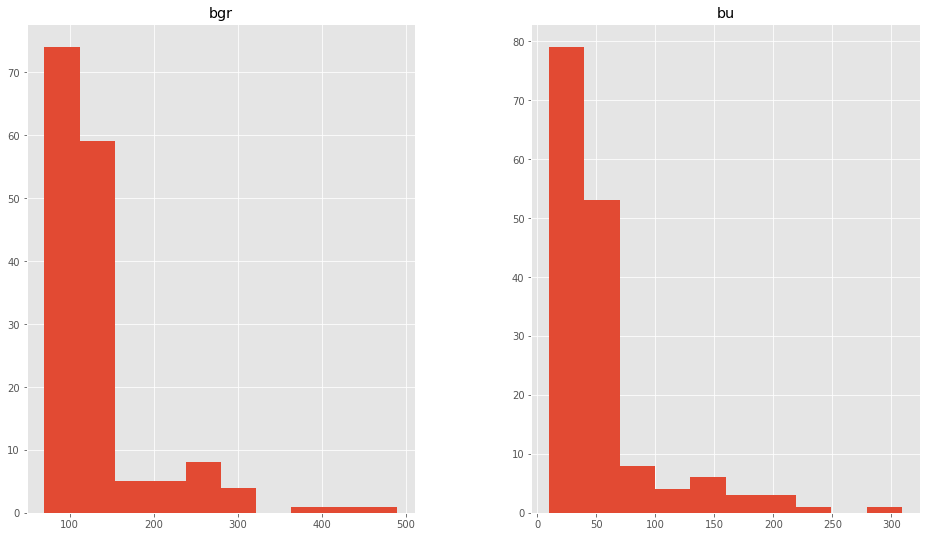

In [60]:
data.drop(['id','al','ane','appet','ba','age','bp','hemo','cad','dm','htn','pc','pcc','pe','pot','rbc','sc','sg','sod','su'],1).hist()
plt.show()

In [61]:
filtered_data = data[(data['bgr'] >= 10) & (data['bu'] <= 250)]

In [62]:
colores=['orange','blue']
tamanios=[30,60]

In [63]:
f1 = filtered_data['bgr'].values
f2 = filtered_data['bu'].values

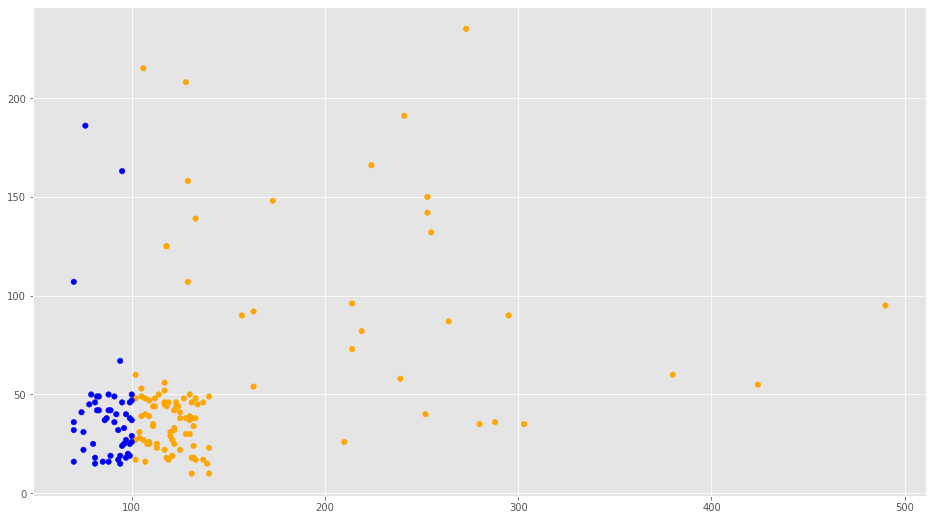

In [64]:
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['bgr']>100):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [65]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["bgr"]]
X_train = np.array(dataX)
y_train = filtered_data['bu'].values

In [66]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

In [67]:
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

In [69]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
print('Error cuadrático medio: %.2f' % mean_squared_error(y_train, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y_train, y_pred))


Coefficients: 
 [0.22155374]
Independent term: 
 21.90643459940244
Error cuadrático medio: 1618.47
Estadístico R_2: 0.11


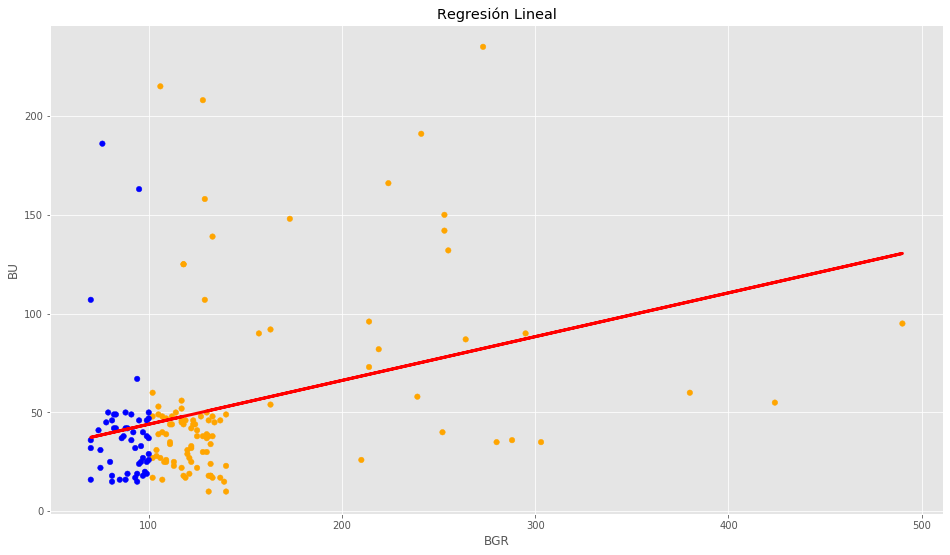

In [53]:
# Visualizamos la nueva recta
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('BGR')
plt.ylabel('BU')
plt.title('Regresión Lineal')

plt.show()

In [55]:
#Vamos a comprobar:
# según nuestro modelo, hacemos:
y_test = regr.predict([[600]])
print(int(y_test))

154
